# Calcolo differenziale con Phyton: detivate 
<!-- dom:AUTHOR: Carlo Barbieri at Department of Physics, Università Statale di Milano -->
<!-- Author: -->  

C. Barbieri, $\qquad$ **Novembre 2021**.


### Testi di riferimento

Informazioni sulla differenziazione automatica sono disponibili su [wiki](https://en.wikipedia.org/wiki/Automatic_differentiation).\
La documentazione della libreria **autograd** è disponibile [qui](https://github.com/HIPS/autograd).

I seguenti esempi sono adattati dalla documentazione ed esempi di autograd.

<!---
Lezioni su autograd by [Alex Smola, UC Berkeley](https://www.youtube.com/watch?v=fRf4l5qaX1M&ab_channel=AlexSmola)
--->




## Differenziazione automatica


La [differenziazione automatica](https://en.wikipedia.org/wiki/Automatic_differentiation) (_automatic differentiation_, AD),
nota anche come _differenziazione algoritmica_ o _differenziazione computazionale_, è un insieme di tecniche per il calcolo automatico delle derivate di una funzione matematica implementata da un programma informatico. AD, sfrutta il fatto che ogni programma di computer, semplice o complicato che sia, deve eseguire una serie di operazioni aritmetiche elementari (somme, sottrazioni, moltiplicazioni, divisioni, eccc...) o applica delle funzioni elementari (exp, log, sin, cos, etc.). 
Se si applia ripetutamente la regola a catena per la derivata delle funzioni di funzioni a questa sequenza di operazioni, è possibile calcolare automaticamente derivate di ordine arbitrario.
I risultati sono accurati, alla precisione numerica della macchina, e usano al masssimo
un poche più operazioni aritmentiche del programma originale.

La differenziazione automatica non è:

* Differenziazione simbolica (per esempio come fatta da *Mathematica* o *SageMath*), né

* Differenziazione numerica (ovvero, non è una *approssimazione alle differenze finite*).

La differenziazione simbolica può generare codici inefficienti e presenta
difficoltà nel convertire un programma di computer in una espressione aritmetica.
La differenziazione numerica può introdurre errori di numerici dovuti alla
discretizazione e a cancellazioni.


Python ha strumenti per la **differenziazzione automatica**. Consideriamo l'esempio seguente:

$$
f(x) = \sin\left(2\pi x + x^2\right)
$$

che ha come derivata

$$
f'(x) = \cos\left(2\pi x + x^2\right)\left(2\pi + 2x\right)
$$

Usando **autograd** si implementa il codice seguente:

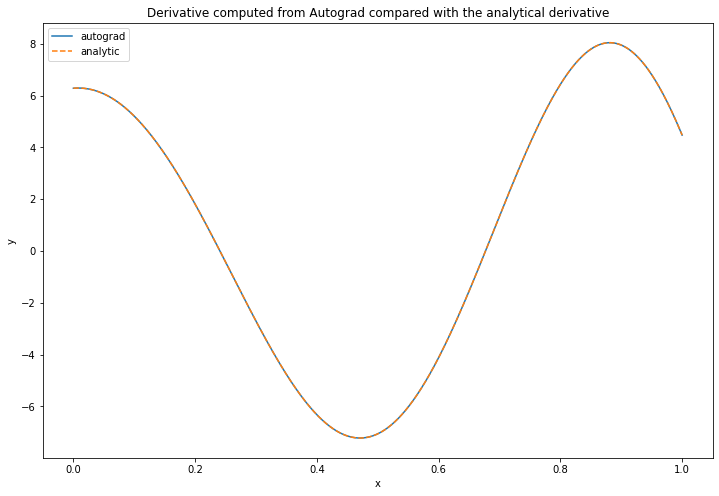

The max absolute difference is: 1.77636e-15


In [17]:

import autograd.numpy as np  # da ora in poi 'np' non è numpy ma la versione delle  
                             # funziorni numpy implementate sotto 'autograd'

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 

# To plot:
import matplotlib.pyplot as plt 


# Definizione della funzione:
def f(x):
    return np.sin(2*np.pi*x + x**2)

# Definiamo un nostro metodo per calcolare la derivata: 
def f_grad_analytic(x):
    return np.cos(2*np.pi*x + x**2)*(2*np.pi + 2*x)


#
# Quesrto il punto cruciale: chiamiamo il metodo 'autograd.elementwise_grad' che prende la
# funzione f() come input e restituisce il puntatore ad una finzione per la derivata che 
# è stata generata automaticamente:
f_grad = egrad(f)


# Ora si può frare il confromto tra il nostro metodo (analitico) e quello generato da autograd:
# ---------------------------------------------------------------------------------------------

# mesh di punti da calcolare
x = np.linspace(0,1,1000)

computed = f_grad(x)          # autograd
analytic = f_grad_analytic(x) # implementata a mano

plt.figure(figsize=(12,8))
plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x,analytic,'--',label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(np.max(np.abs(computed - analytic))))

<!-- !split  -->
## Uso di Autograd

Vediamo alcuni casi funzioni per le quali Autograd può trovare il gradiente.
I metodi di Python seguenti sono in tesi a come casi illustrativi ma l'utente
provare a sperimentare anche con altre funzioni, magariu più complesse.

In [100]:
import autograd.numpy as np
from autograd import grad

def f1(x):
    return x**3 + 1

f1_grad = grad(f1)

# Remember to send in float as argument to the computed gradient from Autograd!
a = 2.0

# See the evaluated gradient at a using autograd:
print("The gradient of f1 evaluated at a = %g using autograd is: %g"%(a,f1_grad(a)))

# Compare with the analytical derivative, that is f1'(x) = 3*x**2 
grad_analytical = 3*a**2
print("The gradient of f1 evaluated at a = %g by finding the analytic expression is: %g"%(a,grad_analytical))

The gradient of f1 evaluated at a = 2 using autograd is: 12
The gradient of f1 evaluated at a = 2 by finding the analytic expression is: 12


### Autograd con funzioni più complicate

Per differenziare una function di Python rispetto a due o più argomenti, Autograd 
ha bisogno di sapere rispetto a quale variqabile si vuol calcolare la derivata.

In [102]:
import autograd.numpy as np
from autograd import grad
def f2(x1,x2):
    return 3*x1**3 + x2*(x1 - 5) + 1

# By sending the argument 0, Autograd will compute the derivative w.r.t the first variable, in this case x1
f2_grad_x1 = grad(f2,0)

# ... and differentiate w.r.t x2 by sending 1 as an additional arugment to grad
f2_grad_x2 = grad(f2,1)

x1 = 1.0
x2 = 5.5 

print("Evaluating at x1 = %g, x2 = %g"%(x1,x2))
print("-"*30)

# Compare with the analytical derivatives:

# Derivative of f2 w.r.t x1 is: 9*x1**2 + x2:
f2_grad_x1_analytical = 9*x1**2 + x2

# Derivative of f2 w.r.t x2 is: x1 - 5:
f2_grad_x2_analytical = x1 - 5

# See the evaluated derivations:
print("The derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))
print("The analytical derivative of f2 w.r.t x1: %g"%( f2_grad_x1_analytical ))

print()

print("The derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))
print("The analytical derivative of f2 w.r.t x2: %g"%( f2_grad_x2_analytical ))

Evaluating at x1 = 1, x2 = 5.5
------------------------------
The derivative of f2 w.r.t x1: 14.5
The analytical derivative of f2 w.r.t x1: 14.5

The derivative of f2 w.r.t x2: -4
The analytical derivative of f2 w.r.t x2: -4


Si noti the il metodo 'autograd.grad' non produge il gradiente di una funzone a più variabili ma la derivata rispetto ad una variabile in particolare. Il vero gradiente fi una funzione di due o più variabili è un vettore!

### Funzioni più complesse che usano direttamente gli elementi di un vettore passato come argomento

In [2]:
import autograd.numpy as np
from autograd import grad
def f3(x): # Assumes x is an array of length 5 or higher
    return 2*x[0] + 3*x[1] + 5*x[2] + 7*x[3]*x[2] + 11*x[4]**2

f3_grad = grad(f3)

#x = np.linspace(0,4,5)
x = np.array([1., 3., 1., 5., 7.])

# Print the list of input variables:
print("The valuses of x[] are: ", x)

# Print the computed gradient:
print("The computed gradient of f3 is: ", f3_grad(x))

# The analytical gradient is: (2, 3, 5+7*x[3], 7*x[2], 22*x[4])
f3_grad_analytical = np.array([2, 3, 5+7*x[3], 7*x[2], 22*x[4]])

# Print the analytical gradient:
print("The analytical gradient of f3 is: ", f3_grad_analytical)

The valuses of x[] are:  [1. 3. 1. 5. 7.]
The computed gradient of f3 is:  [  2.   3.  40.   7. 154.]
The analytical gradient of f3 is:  [  2.   3.  40.   7. 154.]



In questo caso, poiché abbiamo mandato un array di argomenti come input alla funzione f3(),
il risultato di Autograd sarà un altro array. al contrario dell'esempio precedente, questa volta
è il vero frafiente della funzione: se si rapprasentano le varie varuabili di input come 
array può risultare più facile lavorare con i risultati dati da Autograd sicome questi sono
più vicini a quanto ci si apstetta da funzioni di calcolo del gradiente.

<!-- !split  -->
## Funzioni che usano funzioni matematiche di Numpy

In [3]:
import autograd.numpy as np
from autograd import grad
def f4(x):
    return np.sqrt(1+x**2) + np.exp(x) + np.sin(2*np.pi*x)

f4_grad = grad(f4)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f4 at x = %g is: %g"%(x,f4_grad(x)))

# The analytical derivative is: x/sqrt(1 + x**2) + exp(x) + cos(2*pi*x)*2*pi
f4_grad_analytical = x/np.sqrt(1 + x**2) + np.exp(x) + np.cos(2*np.pi*x)*2*np.pi

# Print the analytical gradient:
print("The analytical gradient of f4 at x = %g is: %g"%(x,f4_grad_analytical))

The computed derivative of f4 at x = 2.7 is: 13.8759
The analytical gradient of f4 at x = 2.7 is: 13.8759


## Strutture di controllo

Autograd funziona coi codici di Python and Numpy ordinari che le strutture di cotrollo più usuali, inclusi  cicli di 'for' e 'while', istruzione condicionali 'if'  e closures.

In [4]:
import autograd.numpy as np
from autograd import grad
def f5(x):
    if x >= 0:
        return x**2
    else: 
        return -3*x + 1

f5_grad = grad(f5)

x = 0.0000

# Print the computed derivative:
print("The computed derivative of f5 at x = %g is: %g"%(x,f5_grad(x)))

The computed derivative of f5 at x = 0 is: 0


Un esempio con i loop:

In [5]:
import autograd.numpy as np
from autograd import grad
# Both of the functions are implementation of the sum: sum(x**i) for i = 0, ..., 9
# The analytical derivative is: sum(i*x**(i-1)) 

def f6(x):
    somma = 0.
    for i in range(10):
        somma = somma + x**i
    return somma

f6_grad = grad(f6)

x =  1.3

f6_grad_analytical = 0
for i in range(10):
    f6_grad_analytical += i*x**(i-1)


print("The  computed  derivative of f6 at x = %g is: %g"%(x,f6_grad(x)        ) )
print("The analytical derivative of f6 at x = %g is: %g"%(x,f6_grad_analytical) )

The  computed  derivative of f6 at x = 1.3 is: 211.418
The analytical derivative of f6 at x = 1.3 is: 211.418


## Strutture ricorsive

In [8]:
import autograd.numpy as np
from autograd import grad

def f7(n): # Assume that n is an integer
    if n == 1 or n == 0:
        return 1
    else:
        return n*f7(n-1)

f7_grad = grad(f7)

n = 4.

print("The computed derivative of f7 at n = %d is: %g"%(n,f7_grad(n)))

# The function f7 is an implementation of the factorial of n.
# By using the product rule, one can find that the derivative is:

f7_grad_analytical = 0
for i in range(int(n)-1):
    tmp = 1
    for k in range(int(n)-1):
        if k != i:
            tmp *= (n - k)
    f7_grad_analytical += tmp

print("The analytical derivative of f7 at n = %d is: %g"%(n,f7_grad_analytical))

The computed derivative of f7 at n = 4 is: 26
The analytical derivative of f7 at n = 4 is: 26


Si noti che quando 'n' è uguale a zero o uno Autograd restituisce un messaggio di error. Il messaggio viene dato perché il valore della funzione non dipende da quello dell'input.

### Funzioni non supportate

Autograd ha molte funzionalità, tuttavia ci sono alcune funzioni che non sono (ancora) incluse.

Una di queste è l'assegnazione di un valore ad una delle variabili rispetto a cui si sta differenziano:

In [ ]:
import autograd.numpy as np
from autograd import grad
def f8(x): # Assume x is an array
    x[2] = 3
    return x*2

f8_grad = grad(f8)

x = np.array([2.1,4.2,8.4])

print("The derivative of f8 is:",f8_grad(x))

Qui Autograd risponde che 'ArrayBox' non permette l'assegnazone ad una variabile. Quersto succede quando il programma tenta di assegnare il valore 3 a x[2].

### La sintassi a.dot(b) per il calcolo dle prodotto scalare

In [13]:
import autograd.numpy as np
from autograd import grad

def f9(a): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return a.dot(b)
    #return a[0]*b[0] + a[1]*b[1]
    #return a[0]*b[0] + (a[1]**3)*b[1]

f9_grad = grad(f9)

x = np.array([1.0,7.0])

#print("The functon f9 is:",f9(x))
print("The derivative of f9 is:",f9_grad(x))

The derivative of f9 is: [  1. 294.]


Eseguendo la cella precedente, ci viene risposto che la funzione 'dot' non appartiene a quelle di Numpy  implementate sotto autograd. Si privi a modificare la funzione f9() sipra implementando il prodotto scalalre esplicitametne e l'errore sparirà.

Per evitare il messaggio di errore si può usare una sintassi alternativa per il calcolo del prodotto scalare:

In [14]:
import autograd.numpy as np
from autograd import grad
def f9_alternative(x): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(x,b) # The same as x_1*b_1 + x_2*b_2

f9_alternative_grad = grad(f9_alternative)

x = np.array([3.0,0.0])

print("The gradient of f9 is:",f9_alternative_grad(x))

# The analytical gradient of the dot product of vectors x and b with two elements (x_1,x_2) and (b_1, b_2) respectively
# w.r.t x is (b_1, b_2).

The gradient of f9 is: [1. 2.]


### Operazioni da evitare
La documentazione di autograd racommanda di evitare operazioni implicite come

In [ ]:
a += b
a -= b
a *= b
a /=b